In [1]:
# sudo apt-get install postgis osm2pgsql 

In [2]:
!createdb osm
!psql -c "CREATE EXTENSION postgis" osm

CREATE EXTENSION


In [3]:
!psql  -t -c  "SELECT postgis_full_version()" osm

 POSTGIS="2.5.0dev r16367" [EXTENSION] PGSQL="100" GEOS="3.6.2-CAPI-1.10.2 4d2925d6" PROJ="Rel. 4.9.2, 08 September 2015" GDAL="GDAL 2.1.3, released 2017/20/01" LIBXML="2.9.3" LIBJSON="0.11.99" RASTER



In [4]:
!psql -c "CREATE SCHEMA data" osm

CREATE SCHEMA


In [5]:
# From https://www.data.gouv.fr/fr/datasets/admin-express/
!wget -O /tmp/admin_express.7z "https://www.data.gouv.fr/fr/datasets/r/596a0eb8-aa71-4387-9fa3-214d2d3301e2"
!7za x -o/tmp -y /tmp/admin_express.7z 

--2018-02-06 12:13:15--  https://www.data.gouv.fr/fr/datasets/r/596a0eb8-aa71-4387-9fa3-214d2d3301e2
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.73
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.73|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://wxs-telechargement.ign.fr/x02uy2aiwjo9bm8ce5plwqmr/telechargement/prepackage/ADMINEXPRESS-PACK_2017-06-20$ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/file/ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20.7z [following]
--2018-02-06 12:13:15--  https://wxs-telechargement.ign.fr/x02uy2aiwjo9bm8ce5plwqmr/telechargement/prepackage/ADMINEXPRESS-PACK_2017-06-20$ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/file/ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20.7z
Resolving wxs-telechargement.ign.fr (wxs-telechargement.ign.fr)... 160.92.169.206
Connecting to wxs-telechargement.ign.fr (wxs-telechargement.ign.fr)|160.92.169.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36652407 (35M) [app

Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_LAMB93_FR/ARRONDISSEMENT_DEPARTEMENTAL.shp
Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_UTM20W84GUAD_D971/CHEF_LIEU.shp
Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_UTM20W84MART_D972/CHEF_LIEU.shp
Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_UTM22RGFG95_D973/CHEF_LIEU.shp
Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_RGR92UTM40S_D974/CHEF_LIEU.shp
Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_RGM04UTM38S_D976/CHEF_LIEU.shp
Extracting  ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_LAMB93_FR/CHEF_LIEU.shp
Extracting  ADMIN-EX

In [6]:
!shp2pgsql -s 2154 -I -D \
     /tmp/ADMIN-EXPRESS_1-1__SHP__FRA_2017-06-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2017-06-20/ADE_1-1_SHP_LAMB93_FR/COMMUNE.shp \
     data.district_area | psql osm

Shapefile type: Polygon
Postgis type: MULTIPOLYGON[2]
SET
SET
BEGIN
CREATE TABLE
ALTER TABLE
                      addgeometrycolumn                      
-------------------------------------------------------------
 data.district_area.geom SRID:2154 TYPE:MULTIPOLYGON DIMS:2 
(1 row)

COPY 35287
CREATE INDEX
COMMIT
ANALYZE


In [7]:
!psql -c "\d data.district_area" osm

                                            Table "data.district_area"
   Column   |            Type             | Collation | Nullable |                     Default                     
------------+-----------------------------+-----------+----------+-------------------------------------------------
 gid        | integer                     |           | not null | nextval('data.district_area_gid_seq'::regclass)
 id         | character varying(24)       |           |          | 
 nom_com    | character varying(50)       |           |          | 
 nom_com_m  | character varying(50)       |           |          | 
 insee_com  | character varying(5)        |           |          | 
 statut     | character varying(22)       |           |          | 
 population | integer                     |           |          | 
 insee_arr  | character varying(2)        |           |          | 
 nom_dep    | character varying(30)       |           |          | 
 insee_dep  | character varying(3)    

In [8]:
!psql -t -c "SELECT ST_Extent(ST_Transform(ST_SetSRID(   \
             ST_MakeEnvelope(880000,6500000,920000,6540000), 2154), 4326)) bbox" osm \
| sed -e 's/ BOX(//' -e 's/ /,/g' -e 's/)//'

5.30833180920096,45.5641283354517,5.83933234398608,45.9358647543372



In [9]:
!wget -O /tmp/raster.jpeg "https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=5.30833180920096,45.5641283354517,5.83933234398608,45.9358647543372&width=4000&height=4000&srs=epsg:4326"

--2018-02-06 12:13:35--  https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless&bbox=5.30833180920096,45.5641283354517,5.83933234398608,45.9358647543372&width=4000&height=4000&srs=epsg:4326
Resolving tiles.maps.eox.at (tiles.maps.eox.at)... 88.99.138.151
Connecting to tiles.maps.eox.at (tiles.maps.eox.at)|88.99.138.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2197059 (2.1M) [image/jpeg]
Saving to: ‘/tmp/raster.jpeg’

/tmp/raster.jpeg    100%[===================>]   2.09M  7.66MB/s    in 0.3s    

2018-02-06 12:13:36 (7.66 MB/s) - ‘/tmp/raster.jpeg’ saved [2197059/2197059]



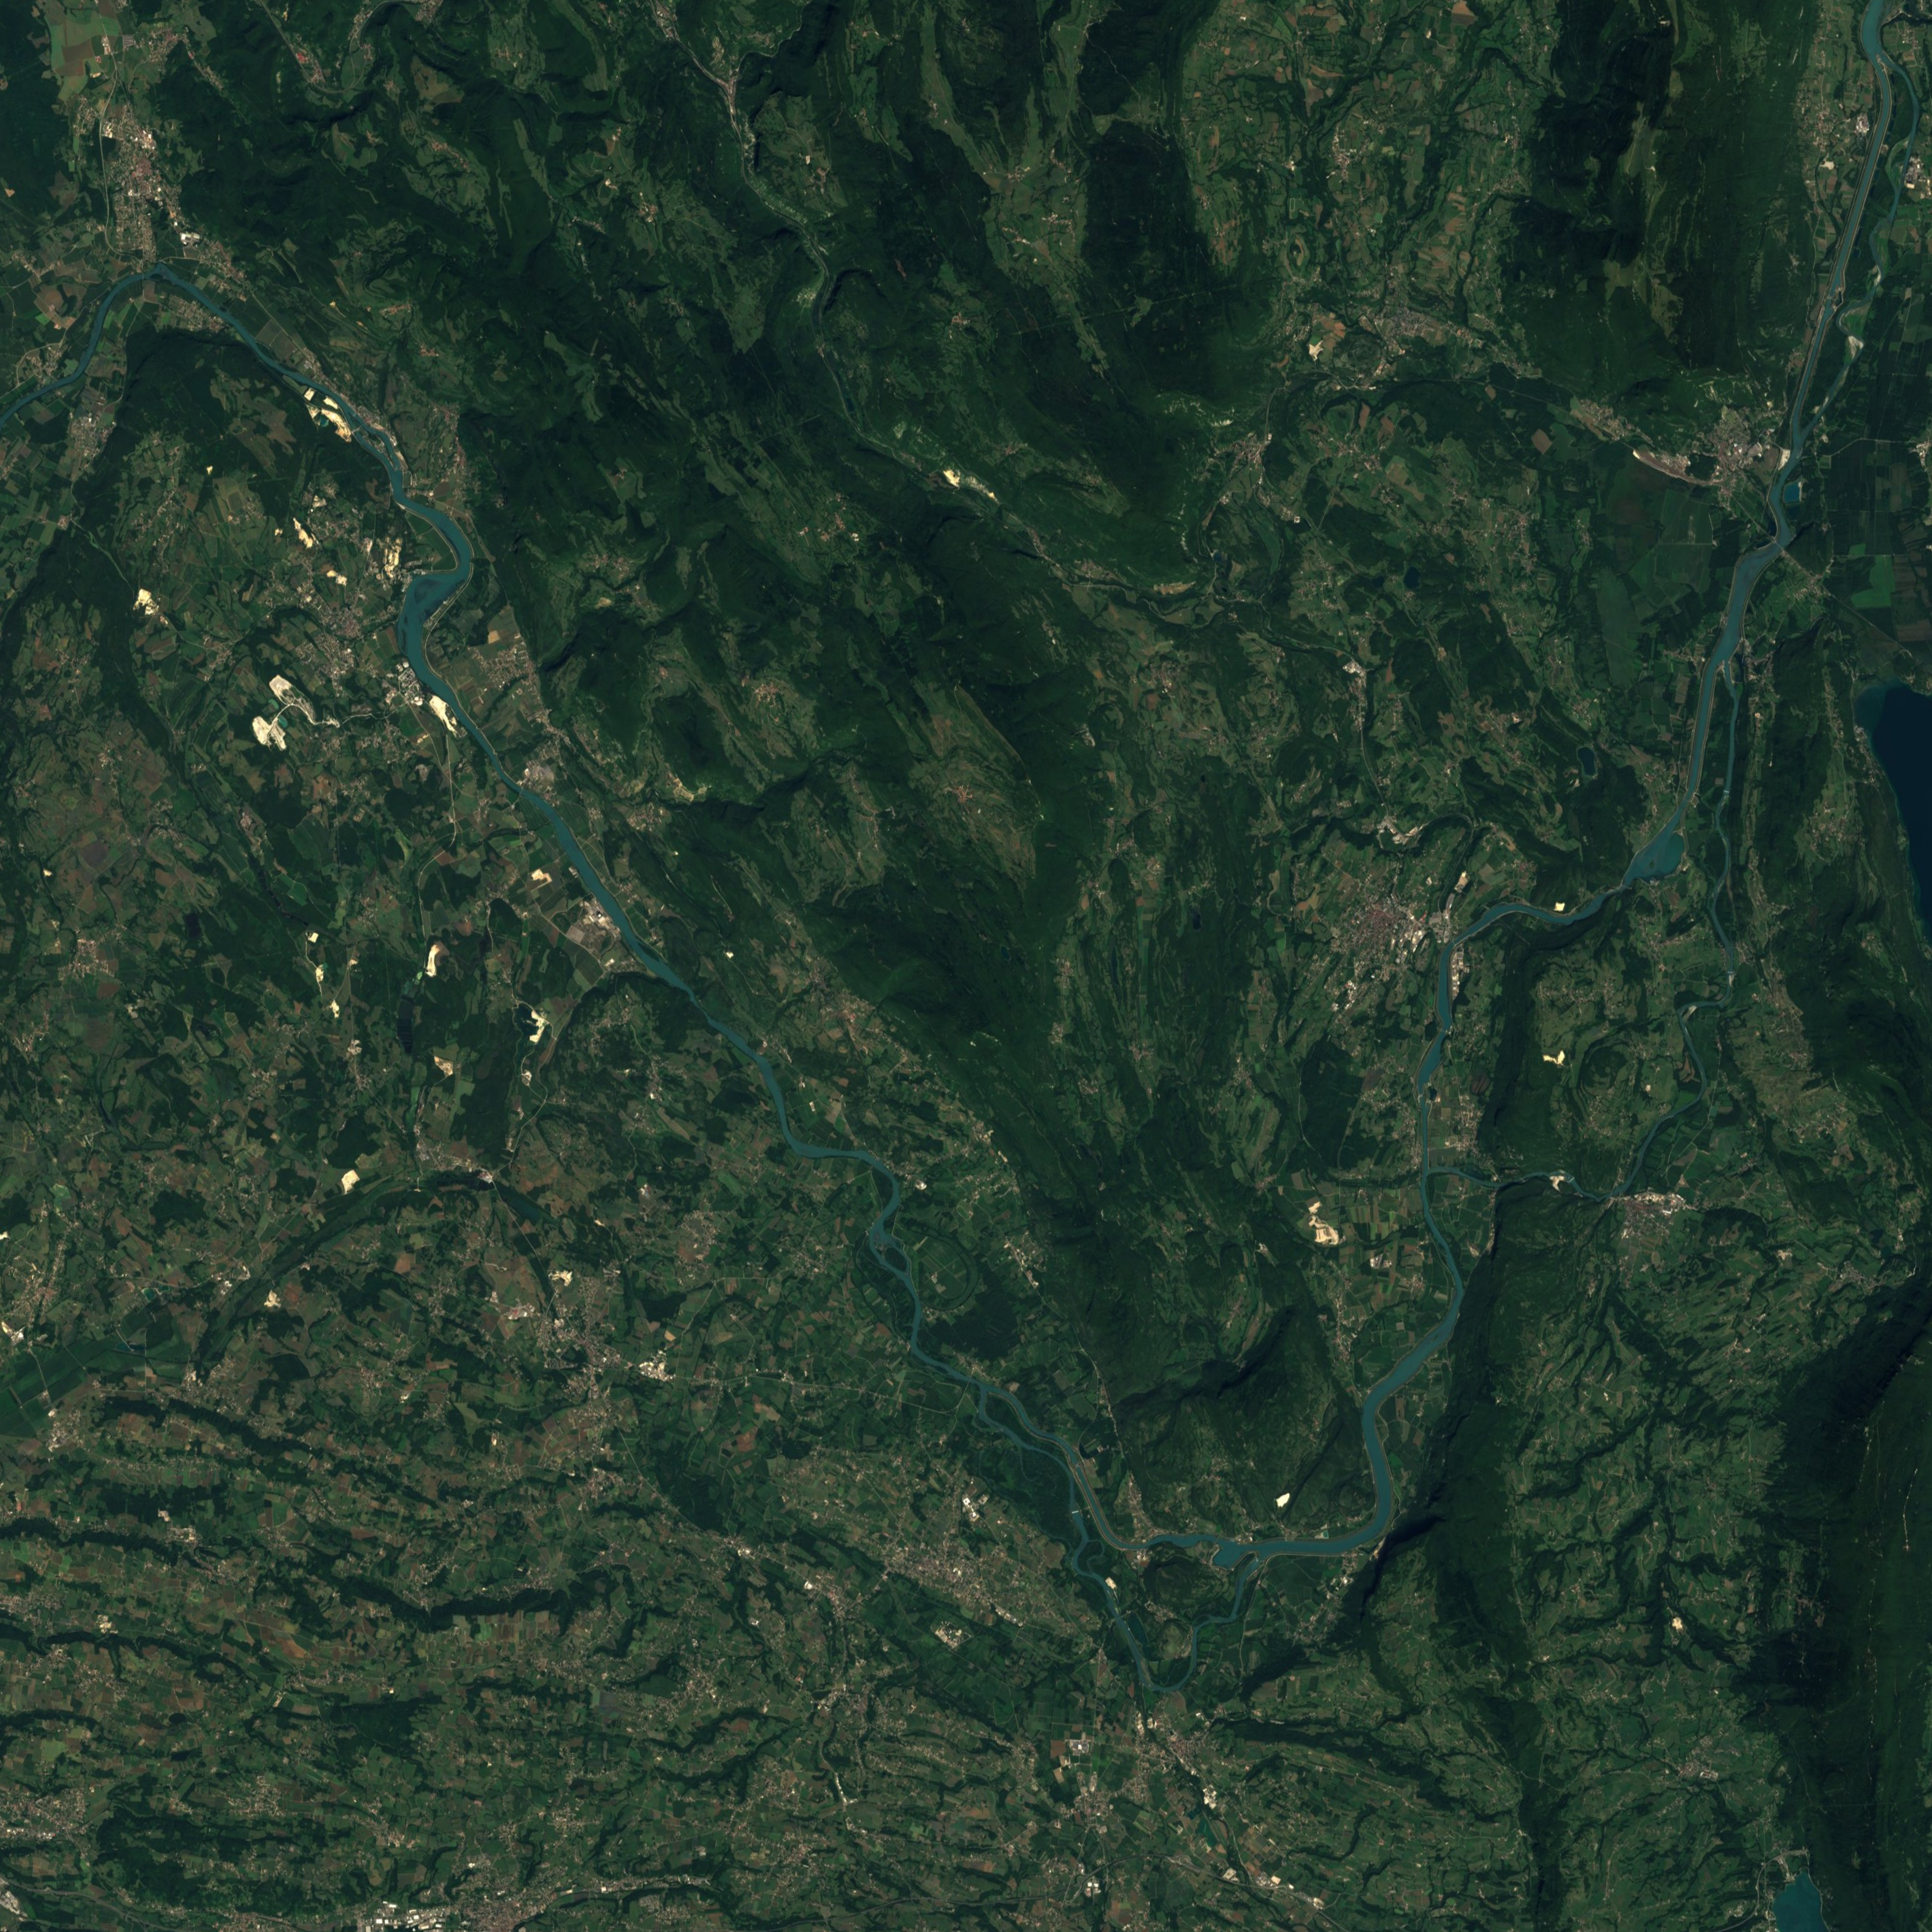

In [10]:
import IPython.display as ipd
ipd.Image("/tmp/raster.jpeg")

In [11]:
!gdal_translate \
   -of GTiff \
   -a_srs EPSG:4326 \
   -a_ullr  5.30833180920096 45.9358647543372 5.83933234398608 45.5641283354517 \
   /tmp/raster.jpeg /tmp/raster.tiff

!gdalwarp -t_srs EPSG:2154 /tmp/raster.tiff /tmp/raster_2154.tiff

!gdal_translate -srcwin 500 500 2560 2560 /tmp/raster_2154.tiff /tmp/raster.tiff

!gdalinfo /tmp/raster.tiff

Input file size is 4000, 4000
0...10...20...30...40...50...60...70...80...90...100 - done.
Processing input file /tmp/raster.tiff.
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 4128, 4128
0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: /tmp/raster.tiff
Size is 2560, 2560
Coordinate System is:
PROJCS["RGF93 / Lambert-93",
    GEOGCS["RGF93",
        DATUM["Reseau_Geodesique_Francais_1993",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6171"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4171"]],
    PROJECTION["Lambert_Conformal_Conic_2SP"],
    PARAMETER["standard_parallel_1",49],
    PARAMETER["standard_parallel_2",44],
    PARAMETER["latitude_of_origin",46.5],
   

In [12]:
!raster2pgsql -d -s 2154 -I -Y -t auto -C -r /tmp/raster.tiff data.sentinel | psql osm

Processing 1/1: /tmp/raster.tiff
INFO: Using computed tile size: 32x32
BEGIN
NOTICE:  table "sentinel" does not exist, skipping
DROP TABLE
CREATE TABLE
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11
COPY 11


In [13]:
!wget -O /tmp/ra-osm.pbf http://download.geofabrik.de/europe/france/rhone-alpes-latest.osm.pbf

--2018-02-06 12:13:40--  http://download.geofabrik.de/europe/france/rhone-alpes-latest.osm.pbf
Resolving download.geofabrik.de (download.geofabrik.de)... 144.76.80.19, 138.201.81.20
Connecting to download.geofabrik.de (download.geofabrik.de)|144.76.80.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350310330 (334M) [application/octet-stream]
Saving to: ‘/tmp/ra-osm.pbf’

/tmp/ra-osm.pbf     100%[===================>] 334.08M  86.9MB/s    in 3.8s    

2018-02-06 12:13:44 (87.2 MB/s) - ‘/tmp/ra-osm.pbf’ saved [350310330/350310330]



In [14]:
!osm2pgsql -G -E 2154 -C 12000 -p osm -d osm /tmp/ra-osm.pbf

osm2pgsql SVN version 0.88.1 (64bit id space)

Using built-in tag processing pipeline
Using projection SRS 2154 (EPSG:2154)
Setting up table: osm_point
Setting up table: osm_line
Setting up table: osm_polygon
Setting up table: osm_roads
Allocating memory for dense node cache
Allocating dense node cache in one big chunk
Allocating memory for sparse node cache
Sharing dense sparse
Node-cache: cache=12000MB, maxblocks=1536000*8192, allocation method=3
Mid: Ram, scale=100

Reading in file: /tmp/ra-osm.pbf
Processing: Node(37147k 2476.5k/s) Way(5089k 108.29k/s) Relation(56040 1018.91/s)  parse time: 117s
Node stats: total(37147154), max(5390993512) in 15s
Way stats: total(5089745), max(558908075) in 47s
Relation stats: total(56045), max(7987253) in 55s
Committing transaction for osm_point
Committing transaction for osm_line
Committing transaction for osm_polygon
Committing transaction for osm_roads
Using built-in tag processing pipeline

Going over pending ways...
	4326269 ways are pending


In [15]:
!psql -c "\dt osm*" osm

          List of relations
 Schema |    Name     | Type  | Owner 
--------+-------------+-------+-------
 public | osm_line    | table | o
 public | osm_point   | table | o
 public | osm_polygon | table | o
 public | osm_roads   | table | o
(4 rows)



In [16]:
!psql -c "\d osm_polygon" osm

                          Table "public.osm_polygon"
       Column       |          Type           | Collation | Nullable | Default 
--------------------+-------------------------+-----------+----------+---------
 osm_id             | bigint                  |           |          | 
 access             | text                    |           |          | 
 addr:housename     | text                    |           |          | 
 addr:housenumber   | text                    |           |          | 
 addr:interpolation | text                    |           |          | 
 admin_level        | text                    |           |          | 
 aerialway          | text                    |           |          | 
 aeroway            | text                    |           |          | 
 amenity            | text                    |           |          | 
 area               | text                    |           |          | 
 barrier            | text                    |           |        

In [17]:
!psql -c "SELECT count(*) AS invalid FROM osm_polygon WHERE NOT ST_IsValid(way)" osm

 invalid 
---------
       0
(1 row)



In [18]:
!psql -c "SELECT count(*) AS total FROM osm_polygon" osm

  total  
---------
 4278260
(1 row)

